In [258]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import Regression_tasks
import EDA_Visualization
import re
import glob
import os
import imp
imp.reload(EDA_Visualization)

<module 'Visualization_EDA' from '/media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging Project/Code/Visualization_EDA.py'>

In [248]:
###### load the IXI data files #######

IXI_data_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/IXI_T1w/"
BraTS_data_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/BraTS_T1w_2020/"
ICBM_data_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/ICBM_T1w/"
OASIS2_data_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/OASIS2_T1w_HC/"


ixi_metadata_file = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/IXI/IXI_participants.xls"
# sbm_ages = pd.read_csv("/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/IXI_T1w/SBM_thickness/Ages.csv", header=None)
ICBM_metadata_file = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/ICBM/T1w_MRI_HC_Summary_ICBM.csv"
OASIS2_metadata_file = "/media/dataanalyticlab/Drive2/MANSOOR/Dataset/Preprocessed_MRIs/CAT12_VBM/OASIS2_T1w_HC/OASIS2_HC_Subj_Metadata.csv"

demographics_path = "/media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging Project/Brain_tumor_project/Participants_demographics_data/"

figures_path = "/media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging Project/Brain_tumor_project/Brain_tumor_results/"

In [ ]:
########### get the age labels of IXI data rows ###########
data_matrix_file = IXI_data_dir + vol_files[8] + ".csv"
dataMatrix = pd.read_csv(data_matrix_file)
metaData = pd.read_excel(metadata_file)

# extract the subject IDs from the data matrix
dataMatrixIDs = dataMatrix.iloc[:, 0]
ids = []
for i in range(0,len(dataMatrixIDs)):
    id_i = re.search(r'IXI(.*?)-', dataMatrixIDs[i])
    id_i =  int(id_i.groups(1)[0])
    ids.append(id_i)


# compare the metadata file and the data matrix and find the matching IDs
ages = []
match_ids = []
for i in range(0,len(ids)):
    for j in range(0, len(metaData)):
        if (metaData.iloc[j,0] == ids[i]):
            # print(metaData.iloc[j,0])
            ages.append(metaData.iloc[j,1])
            match_ids.append(metaData.iloc[j,0])
            break


# Find the subject IDs in the data matrix with no available age labels
unmatched_ids = []
for element in ids:
    if element not in match_ids:
        # print(element )
        unmatched_ids.append(element)

# delete the data matrix rows which don't have available age labels
for i in range(0,len(dataMatrixIDs)): 
    id_i = re.search(r'IXI(.*?)-', dataMatrixIDs[i])
    id_i =  int(id_i.groups(1)[0])
    if id_i in unmatched_ids:
        print("deleting the row with id: ", id_i)
        dataMatrix = dataMatrix.drop(dataMatrix[dataMatrix.names == dataMatrixIDs[i]].index)

In [ ]:
########### get the age labels of BraTS data rows ###########

BraTS_metadata_file = BraTS_data_dir + "survival_info.csv"
dataMatrix = BraTS_CAT12_ROI_Vol
metaData = pd.read_csv(BraTS_metadata_file)
ids = metaData.iloc[:,0]
dataMatrixIDs = BraTS_CAT12_ROI_Vol.iloc[:,0]

for i in range(0,len(metaData)):
    metaData.iloc[i,0] = str(metaData.iloc[i,0] + "_t1")

merged = BraTS_CAT12_ROI_Vol.merge(metaData, left_on="names", right_on="Brats20ID", how="inner", suffixes=("_tableA", "_tableB"))
BraTS_CAT12_ROI_Vol_Concat = merged.drop(columns=["Brats20ID", "Survival_days", "Extent_of_Resection"])


In [5]:
########### get the age labels of ICBM data rows ###########

dataMatrix = ICBM_CAT12_ROI_Vol
metaData = pd.read_csv(ICBM_metadata_file)
dataMatrixIDs = ICBM_CAT12_ROI_Vol.loc[:,"names"]
ids=[]
for i in range(0,len(dataMatrixIDs)):
    id_i = re.search(r'ICBM_(.*?)_MR', dataMatrixIDs[i])
    if id_i is not None:   
        id_i =  id_i.groups(1)[0]
        dataMatrix.loc[i,"names"] = id_i
    
    ids.append(id_i)

merged = dataMatrix.merge(metaData, left_on="names", right_on="Subject_ID", how="inner")
ICBM_CAT12_ROI_Vol = merged.drop(columns=["Subject_ID", "Image_ID", "Description"])

# convert to numpy array and save
size = np.shape(ICBM_CAT12_ROI_Vol)
np_CAT12_ROI_Vol_ICBM = ICBM_CAT12_ROI_Vol.to_numpy()
np.save(dir+ dataset+"_VBM_volume/Prep_CAT12_Vol_"+dataset+"_"+str(size[0])+"x"+str(size[1]-2)+".npy", np_CAT12_ROI_Vol_ICBM )
ICBM_CAT12_ROI_Vol.to_csv(dir+ dataset+"_VBM_volume/Prep_CAT12_Vol_"+dataset+"_"+str(size[0])+"x"+str(size[1]-2)+".csv")


In [74]:
# OASIS2_CAT12_ROI_Vol_QC = Perform_QC(OASIS2_CAT12_ROI_Vol, OASIS2_data_dir, "OASIS2", 73)
# OASIS2_CAT12_ROI_Thick_QC = Perform_QC(OASIS2_CAT12_ROI_Thick, OASIS2_data_dir, "OASIS2", 73)
IXI_CAT12_ROI_Vol_Thick_QC = Perform_QC(IXI_Vol_Thick.iloc[:,1:], IXI_data_dir, "IXI", 73)


In [56]:
X_train, X_val, Y_train, Y_val = Regression_tasks.train_test_split(OASIS2_CAT12_ROI_Vol_Thick_QC.iloc[:,1:581], OASIS2_CAT12_ROI_Vol_QC.iloc[:,581])
sc = Regression_tasks.StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

# Y_test = BraTS_CAT12_ROI_Vol_QC.iloc[:,581]
# X_test = BraTS_CAT12_ROI_Vol_QC.iloc[:,1:581]
# X_test = sc.fit_transform(X_test)

glm_gamma = Regression_tasks.linear_model.GammaRegressor(alpha=2.5)
glm_gamma.fit(X_train, Y_train)

Y_pred_val = glm_gamma.predict(X_val)
mae_val = Regression_tasks.mean_absolute_error(Y_val, Y_pred_val)

# Y_pred_test = glm_gamma.predict(X_test)
# mae_test = Regression_tasks.mean_absolute_error(Y_test, Y_pred_test)

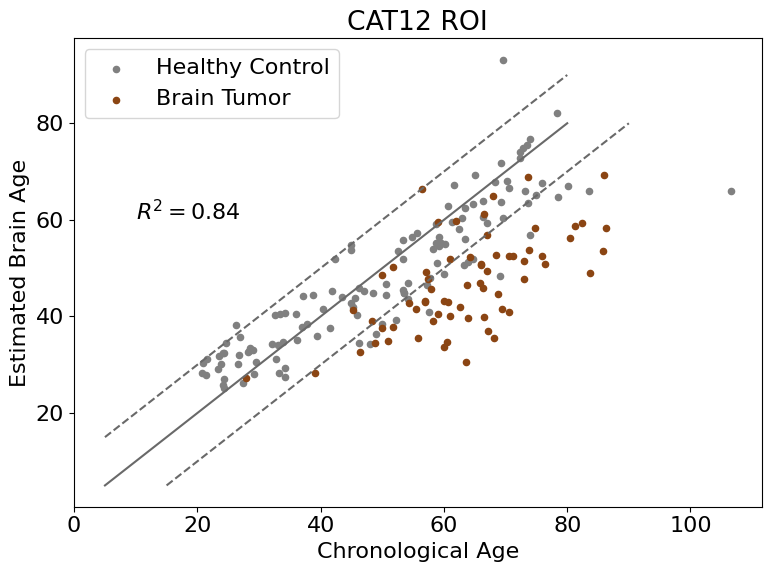

In [431]:
age_gap_results_test = pd.DataFrame({"Chronological Age":Y_test, "Biological Brain Age":Y_pred_test, "Brain Age Gap":Y_pred_test-Y_test}).head(40)
Visualization_EDA.Plot_true_vs_pred(Y_test, Y_pred_test, Y_val, Y_pred_val, "CAT12 ROI", 0.84, figures_path+"True_vs_pred_age/HC_Tumor_true_vs_pred_age_with_legend")
# Visualization_EDA.Plot_true_vs_pred(Y_val, Y_pred_val, "Healthy Controls", 0.84,figures_path+"True_vs_pred_age/HC_true_vs_pred_age")


[31, 37, 42, 48, 54, 60, 66, 71, 77, 83] [0 1 2 3 4 5 6 7 8 9]


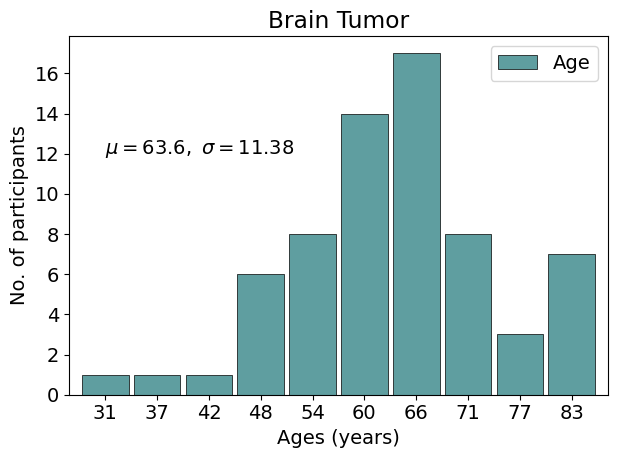

In [260]:
# IXI_Vol_Thick = pd.read_csv(IXI_data_dir+"SBM_thickness/Prep_CAT12_Vol_Thick_IXI_488x800.csv")

# IXI_metadata= pd.DataFrame({"Subject_ID":dataMatrix.loc[:,"names"] ,"Age":dataMatrix.loc[:,"Age"], "Sex":dataMatrix.loc[:,"SEX_ID(1=m,2=f)"]})
# OASIS2_metadata = pd.read_csv(OASIS2_data_dir+"OASIS2_VBM_volume/Prep_CAT12_Vol_OASIS2_QC_IQR_73_51x581.csv").loc[:,["names","Age","M/F"]]
# ICBM_metadata = pd.read_csv(ICBM_data_dir+"ICBM_VBM_volume/Prep_CAT12_Vol_ICBM_QC_28x581.csv").loc[:,["names", "Age","Gender"]]
# BraTS_Ages = pd.read_csv(BraTS_data_dir+"BraTS_VBM_volume/Prep_CAT12_Vol_BraTS_QC_66x580.csv").loc[:,"Age"]

# OASIS2_metadata.columns = ["Subject_ID", "Age", "Sex"]
# ICBM_metadata.columns = ["Subject_ID", "Age", "Sex"]

# IXI_metadata.loc[IXI_metadata["Sex"]==2, "Sex"] = "F"
# IXI_metadata.loc[IXI_metadata["Sex"]==1, "Sex"] = "M"



BraTS_Age = pd.DataFrame({"Age":BraTS_Ages})
# Visualization_EDA.Plot_Age_Hist(OASIS2_Ages, 10, 62,92, "OASIS-2", labels=True, path= figures_path+"Age_gender_dist/HC_OASIS2_")
Visualization_EDA.Plot_Age_Hist(BraTS_Age, "Brain Tumor", 0, figures_path+"Age_distribution_histograms/")
# ICBM_Age_Gend = pd.DataFrame({"Age":ICBM_metadata.loc[:,"Age"], "Sex":ICBM_metadata.loc[:,"Gender"]})

# Visualization_EDA.Plot_Age_Gend_Hist(HC_Metadata.loc[:,["Age", "Sex"]], "Healthy Controls", 6, figures_path+"Age_distribution_histograms/")

# HC_Metadata = pd.concat([IXI_metadata, OASIS2_metadata, ICBM_metadata], ignore_index=True)

# HC_Metadata.to_csv(demographics_path+"Demographics_HC.csv")



In [105]:
metaData = pd.read_excel(ixi_metadata_file)
dataMatrix = IXI_CAT12_ROI_Vol_Thick_QC
# extract the subject IDs from the data matrix
dataMatrixIDs = dataMatrix.loc[:, "names"]
ids = []
for i in range(0,len(dataMatrixIDs)):
    id_i = re.search(r'IXI(.*?)-', dataMatrixIDs[i])
    id_i =  int(id_i.groups(1)[0])
    ids.append(id_i)

dataMatrix = pd.concat([dataMatrix, pd.DataFrame({"Subject ID":ids})], axis=1)
dataMatrix = dataMatrix.merge(metaData, right_on="IXI_ID", left_on="Subject ID", how="inner")
dataMatrix = dataMatrix.drop_duplicates(subset="Subject ID")
dataMatrix = dataMatrix.drop(dataMatrix.columns[[799,800]], axis=1)



In [224]:
X_train, X_test, Y_train, Y_test = Regression_tasks.train_test_split(CAT12_ROI_vol.iloc[:,1:581], ages)
sc = Regression_tasks.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Y_pred = Regression_tasks.GLM_Gamma(X_train, Y_train, X_test, Y_test, "CAT12_ROI_Vol")

Regression_tasks.Add_reg_results().sort_index(ascending=False).head(15)
results = Regression_tasks.Add_reg_results()

In [58]:
df_counts

,0
date_year,
1974,1.0
1981,1.0
1982,1.0
1983,5.0
1984,3.0
1985,26.0
1986,3.0
1987,3.0
1988,2.0
